In [1]:
import numpy as np
import os
import cv2
import PIL
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from os import listdir
from tensorflow.keras.models import Model,load_model
from tensorflow.keras.layers import Conv2D,Input,ZeroPadding2D,BatchNormalization,Flatten,Activation,Dense,MaxPooling2D
from sklearn.model_selection import train_test_split

In [2]:
data_dir =r"C:\Users\Divyansh\Desktop\ML PROJECT HARD\mri_dataset"

In [3]:
import pathlib 
data_dir = pathlib.Path(data_dir)
data_dir

WindowsPath('C:/Users/Divyansh/Desktop/ML PROJECT HARD/mri_dataset')

In [4]:
normal = list(data_dir.glob('normal/*'))
normal[:5]

[WindowsPath('C:/Users/Divyansh/Desktop/ML PROJECT HARD/mri_dataset/normal/Tr-noTr_0000.jpg'),
 WindowsPath('C:/Users/Divyansh/Desktop/ML PROJECT HARD/mri_dataset/normal/Tr-noTr_0001.jpg'),
 WindowsPath('C:/Users/Divyansh/Desktop/ML PROJECT HARD/mri_dataset/normal/Tr-noTr_0002.jpg'),
 WindowsPath('C:/Users/Divyansh/Desktop/ML PROJECT HARD/mri_dataset/normal/Tr-noTr_0003.jpg'),
 WindowsPath('C:/Users/Divyansh/Desktop/ML PROJECT HARD/mri_dataset/normal/Tr-noTr_0004.jpg')]

In [5]:
Moderate_Demented = list(data_dir.glob('Moderate_Demented/*'))
Moderate_Demented[:5]

[WindowsPath('C:/Users/Divyansh/Desktop/ML PROJECT HARD/mri_dataset/Moderate_Demented/a00678ed-25e8-411b-a150-588a04cee314.jpg'),
 WindowsPath('C:/Users/Divyansh/Desktop/ML PROJECT HARD/mri_dataset/Moderate_Demented/a0092990-09c0-49fc-9657-6909058b4ebe.jpg'),
 WindowsPath('C:/Users/Divyansh/Desktop/ML PROJECT HARD/mri_dataset/Moderate_Demented/a009683d-c452-41b1-a376-abde071e2615.jpg'),
 WindowsPath('C:/Users/Divyansh/Desktop/ML PROJECT HARD/mri_dataset/Moderate_Demented/a01670f6-b32a-4366-b9ba-1f5b79ce02ef.jpg'),
 WindowsPath('C:/Users/Divyansh/Desktop/ML PROJECT HARD/mri_dataset/Moderate_Demented/a01cec23-4913-4214-aef6-a8f489a60fda.jpg')]

In [6]:
MildDemented = list(data_dir.glob('MildDemented/*'))
MildDemented[:5]

[WindowsPath('C:/Users/Divyansh/Desktop/ML PROJECT HARD/mri_dataset/MildDemented/0123733a-36a6-498c-b310-9366879b874e.jpg'),
 WindowsPath('C:/Users/Divyansh/Desktop/ML PROJECT HARD/mri_dataset/MildDemented/012668ba-51a4-41d2-9755-caade71cd418.jpg'),
 WindowsPath('C:/Users/Divyansh/Desktop/ML PROJECT HARD/mri_dataset/MildDemented/01374975-6a60-421f-828c-0dffa8c5b2bf.jpg'),
 WindowsPath('C:/Users/Divyansh/Desktop/ML PROJECT HARD/mri_dataset/MildDemented/016598ae-e1b8-48b1-bee7-1dc3f8a9b1a3.jpg'),
 WindowsPath('C:/Users/Divyansh/Desktop/ML PROJECT HARD/mri_dataset/MildDemented/01710764-48ce-4a51-b414-fe00276d030d.jpg')]

In [7]:
VeryMildDemented = list(data_dir.glob('VeryMildDemented/*'))
Moderate_Demented[:5]

[WindowsPath('C:/Users/Divyansh/Desktop/ML PROJECT HARD/mri_dataset/Moderate_Demented/a00678ed-25e8-411b-a150-588a04cee314.jpg'),
 WindowsPath('C:/Users/Divyansh/Desktop/ML PROJECT HARD/mri_dataset/Moderate_Demented/a0092990-09c0-49fc-9657-6909058b4ebe.jpg'),
 WindowsPath('C:/Users/Divyansh/Desktop/ML PROJECT HARD/mri_dataset/Moderate_Demented/a009683d-c452-41b1-a376-abde071e2615.jpg'),
 WindowsPath('C:/Users/Divyansh/Desktop/ML PROJECT HARD/mri_dataset/Moderate_Demented/a01670f6-b32a-4366-b9ba-1f5b79ce02ef.jpg'),
 WindowsPath('C:/Users/Divyansh/Desktop/ML PROJECT HARD/mri_dataset/Moderate_Demented/a01cec23-4913-4214-aef6-a8f489a60fda.jpg')]

In [8]:
glioma = list(data_dir.glob('glioma/*'))
glioma[:5]

[WindowsPath('C:/Users/Divyansh/Desktop/ML PROJECT HARD/mri_dataset/glioma/Tr-glTr_0000.jpg'),
 WindowsPath('C:/Users/Divyansh/Desktop/ML PROJECT HARD/mri_dataset/glioma/Tr-glTr_0001.jpg'),
 WindowsPath('C:/Users/Divyansh/Desktop/ML PROJECT HARD/mri_dataset/glioma/Tr-glTr_0002.jpg'),
 WindowsPath('C:/Users/Divyansh/Desktop/ML PROJECT HARD/mri_dataset/glioma/Tr-glTr_0003.jpg'),
 WindowsPath('C:/Users/Divyansh/Desktop/ML PROJECT HARD/mri_dataset/glioma/Tr-glTr_0004.jpg')]

In [9]:
meningioma = list(data_dir.glob('meningioma/*'))
meningioma[:5]

[WindowsPath('C:/Users/Divyansh/Desktop/ML PROJECT HARD/mri_dataset/meningioma/Tr-meTr_0000.jpg'),
 WindowsPath('C:/Users/Divyansh/Desktop/ML PROJECT HARD/mri_dataset/meningioma/Tr-meTr_0001.jpg'),
 WindowsPath('C:/Users/Divyansh/Desktop/ML PROJECT HARD/mri_dataset/meningioma/Tr-meTr_0002.jpg'),
 WindowsPath('C:/Users/Divyansh/Desktop/ML PROJECT HARD/mri_dataset/meningioma/Tr-meTr_0003.jpg'),
 WindowsPath('C:/Users/Divyansh/Desktop/ML PROJECT HARD/mri_dataset/meningioma/Tr-meTr_0004.jpg')]

In [10]:
pituitary = list(data_dir.glob('pituitary/*'))
pituitary[:5]

[WindowsPath('C:/Users/Divyansh/Desktop/ML PROJECT HARD/mri_dataset/pituitary/Tr-piTr_0000.jpg'),
 WindowsPath('C:/Users/Divyansh/Desktop/ML PROJECT HARD/mri_dataset/pituitary/Tr-piTr_0001.jpg'),
 WindowsPath('C:/Users/Divyansh/Desktop/ML PROJECT HARD/mri_dataset/pituitary/Tr-piTr_0002.jpg'),
 WindowsPath('C:/Users/Divyansh/Desktop/ML PROJECT HARD/mri_dataset/pituitary/Tr-piTr_0003.jpg'),
 WindowsPath('C:/Users/Divyansh/Desktop/ML PROJECT HARD/mri_dataset/pituitary/Tr-piTr_0004.jpg')]

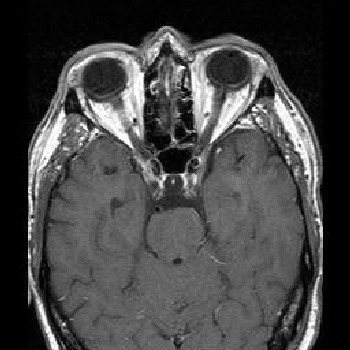

In [11]:
pic = PIL.Image.open(normal[0])
pic

In [12]:
data_dir_mri = {
     'Moderate_Demented' : Moderate_Demented,
       'MildDemented'    : MildDemented,
      'VeryMildDemented' : VeryMildDemented,
               'glioma'  : glioma,
             'meningioma' : meningioma,
             'pituitary' : pituitary,
                'normal' : normal,
}

In [13]:
data_labels = {
    'Moderate_Demented' : 0,
      'MildDemented'    : 1,
     'VeryMildDemented' : 2,
              'glioma'  : 3,
           'meningioma' : 4,   
            'pituitary' : 5,
               'normal' : 6,
}

In [14]:
X,Y = [] , []
for disease , images in data_dir_mri.items():
    for image in images:
      img = cv2.imread(str(image))
      resized_img = cv2.resize(img, (240, 240))  # Resize the cropped image
      X.append(resized_img)  
      Y.append(data_labels[disease])  
    

In [15]:
X = np.array(X)
Y = np.array(Y)

In [16]:
from sklearn.model_selection import train_test_split
X_train, x_test, Y_train, y_test = train_test_split(X, Y, test_size=0.15, random_state=0)

In [19]:
X_train = X_train /255
x_test = x_test/255

In [20]:
data_augmentation = keras.Sequential(
  [
    layers.RandomFlip("horizontal_and_vertical"),
    layers.RandomRotation(0.1),
    layers.RandomZoom(0.1),
    layers.RandomContrast(0.1),
    layers.RandomBrightness(0.1)
  ]
)
    

In [21]:
no_disease = 2
model = keras.Sequential([
    layers.Conv2D(filters = 32, kernel_size = (7,7),activation = 'relu'),
    layers.MaxPooling2D((4,4)),
    layers.Conv2D(filters = 32, kernel_size = (7,7),activation = 'relu'),
    layers.MaxPooling2D((4,4)),
    layers.Flatten(),
    layers.Dense(32,activation = 'relu'),
    layers.Dense(7,activation = 'softmax')
])

In [22]:
model.compile(
    optimizer = 'adam',
            loss = 'sparse_categorical_crossentropy',
    metrics = ['accuracy']
)
model.summary()


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [23]:
model.fit(x=X_train, y=Y_train, batch_size=32, epochs=7)

Epoch 1/7
259/259 ━━━━━━━━━━━━━━━━━━━━ 69s 256ms/step - accuracy: 0.4915 - loss: 1.1860
Epoch 2/7
259/259 ━━━━━━━━━━━━━━━━━━━━ 65s 252ms/step - accuracy: 0.7876 - loss: 0.5121
Epoch 3/7
259/259 ━━━━━━━━━━━━━━━━━━━━ 65s 251ms/step - accuracy: 0.8599 - loss: 0.3412
Epoch 4/7
259/259 ━━━━━━━━━━━━━━━━━━━━ 66s 254ms/step - accuracy: 0.9080 - loss: 0.2211
Epoch 5/7
259/259 ━━━━━━━━━━━━━━━━━━━━ 68s 263ms/step - accuracy: 0.9424 - loss: 0.1528
Epoch 6/7
259/259 ━━━━━━━━━━━━━━━━━━━━ 65s 250ms/step - accuracy: 0.9562 - loss: 0.1152
Epoch 7/7
259/259 ━━━━━━━━━━━━━━━━━━━━ 65s 250ms/step - accuracy: 0.9750 - loss: 0.0617


In [24]:
model.fit(x=X_train, y=Y_train, batch_size=32, epochs=20)

Epoch 1/20
259/259 ━━━━━━━━━━━━━━━━━━━━ 70s 262ms/step - accuracy: 0.9722 - loss: 0.0780
Epoch 2/20
259/259 ━━━━━━━━━━━━━━━━━━━━ 77s 296ms/step - accuracy: 0.9884 - loss: 0.0321
Epoch 3/20
259/259 ━━━━━━━━━━━━━━━━━━━━ 65s 251ms/step - accuracy: 0.9673 - loss: 0.0982
Epoch 4/20
259/259 ━━━━━━━━━━━━━━━━━━━━ 65s 250ms/step - accuracy: 0.9870 - loss: 0.0403
Epoch 5/20
259/259 ━━━━━━━━━━━━━━━━━━━━ 65s 250ms/step - accuracy: 0.9863 - loss: 0.0365
Epoch 6/20
259/259 ━━━━━━━━━━━━━━━━━━━━ 65s 251ms/step - accuracy: 0.9911 - loss: 0.0250
Epoch 7/20
259/259 ━━━━━━━━━━━━━━━━━━━━ 65s 252ms/step - accuracy: 0.9868 - loss: 0.0426
Epoch 8/20
259/259 ━━━━━━━━━━━━━━━━━━━━ 65s 251ms/step - accuracy: 0.9907 - loss: 0.0254
Epoch 9/20
259/259 ━━━━━━━━━━━━━━━━━━━━ 65s 251ms/step - accuracy: 0.9936 - loss: 0.0254
Epoch 10/20
259/259 ━━━━━━━━━━━━━━━━━━━━ 66s 253ms/step - accuracy: 0.9929 - loss: 0.0187
Epoch 11/20
259/259 ━━━━━━━━━━━━━━━━━━━━ 65s 250ms/step - accuracy: 0.9811 - loss: 0.0587
Epoch 12/20
259/259

In [28]:
model.fit(x=X_train, y=Y_train, batch_size=32, epochs=5)

Epoch 1/5
259/259 ━━━━━━━━━━━━━━━━━━━━ 101s 386ms/step - accuracy: 0.9899 - loss: 0.0253
Epoch 2/5
259/259 ━━━━━━━━━━━━━━━━━━━━ 92s 355ms/step - accuracy: 0.9908 - loss: 0.0370
Epoch 3/5
259/259 ━━━━━━━━━━━━━━━━━━━━ 95s 366ms/step - accuracy: 0.9954 - loss: 0.0156
Epoch 4/5
259/259 ━━━━━━━━━━━━━━━━━━━━ 94s 362ms/step - accuracy: 0.9864 - loss: 0.0435
Epoch 5/5
259/259 ━━━━━━━━━━━━━━━━━━━━ 91s 351ms/step - accuracy: 0.9959 - loss: 0.0142


In [30]:
model.fit(x=X_train, y=Y_train, batch_size=32, epochs=5)

Epoch 1/5
259/259 ━━━━━━━━━━━━━━━━━━━━ 109s 411ms/step - accuracy: 0.9994 - loss: 0.0016
Epoch 2/5
259/259 ━━━━━━━━━━━━━━━━━━━━ 101s 388ms/step - accuracy: 1.0000 - loss: 6.5541e-04
Epoch 3/5
259/259 ━━━━━━━━━━━━━━━━━━━━ 98s 376ms/step - accuracy: 1.0000 - loss: 8.5075e-05
Epoch 4/5
259/259 ━━━━━━━━━━━━━━━━━━━━ 99s 383ms/step - accuracy: 1.0000 - loss: 4.9733e-05
Epoch 5/5
259/259 ━━━━━━━━━━━━━━━━━━━━ 97s 373ms/step - accuracy: 1.0000 - loss: 3.7058e-05


In [29]:
model.evaluate(x_test,y_test)

46/46 ━━━━━━━━━━━━━━━━━━━━ 4s 78ms/step - accuracy: 0.9244 - loss: 0.4149


[0.42739155888557434, 0.9356604814529419]

In [26]:
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import numpy as np
import cv2
import gradio as gd
def predict(image):
    image=cv2.resize(image,(240,240))
    image=img_to_array(image)/255.0
    image = np.expand_dims(image, axis=0)  
    prediction=model.predict(image)
    predictions=np.array(prediction)
    predicted_index=np.argmax(predictions)
    index_to_class={0:'Disease : Alzheimer  || Type : Moderate_Demented',
      1:'Disease : Alzheimer || Type : MildDemented',
     2:'Disease : Alzheimer || Type : VeryMildDemented',
            3:'Disease : tumor ||  Type : glioma',
           4:'Disease :tumor ||  Type : meningioma',   
           5: 'Disease : tumor  || Type : pituitary',
               6:'Disease : None'}
    predicted_class_name=index_to_class[predicted_index]
    return predicted_class_name
    

headline="BRAIN DISEASE DETECTION "
a=gd.Interface(predict,inputs=gd.Image(),outputs="text",title=headline)
a.launch()
    

C:\Users\Divyansh\AppData\Roaming\Python\Python311\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Running on local URL:  http://127.0.0.1:7860

To create a public link, set `share=True` in `launch()`.


In [ ]:
from keras.models import load_model

# Assuming 'model' is your trained CNN model
model.save('/Users\Divyansh\Desktop\ML PROJECT HARD\my_model.keras')


In [20]:
model2 = load_model('/Users\Divyansh\Desktop\ML PROJECT HARD\my_model.keras')

In [21]:
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import numpy as np
import cv2
import gradio as gd
def predict(image):
    image=cv2.resize(image,(240,240))
    image=img_to_array(image)/255.0
    image = np.expand_dims(image, axis=0)  
    prediction=model2.predict(image)
    predictions=np.array(prediction)
    predicted_index=np.argmax(predictions)
    index_to_class={0:'Disease : Alzheimer  || Type : Moderate_Demented',
      1:'Disease : Alzheimer || Type : MildDemented',
     2:'Disease : Alzheimer || Type : VeryMildDemented',
            3:'Disease : tumor ||  Type : glioma',
           4:'Disease :tumor ||  Type : meningioma',   
           5: 'Disease : tumor  || Type : pituitary',
               6:'Disease : None'}
    predicted_class_name=index_to_class[predicted_index]
    return predicted_class_name
    

headline="BRAIN DISEASE DETECTION "
a=gd.Interface(predict,inputs=gd.Image(),outputs="text",title=headline)
a.launch()

C:\Users\Divyansh\AppData\Roaming\Python\Python311\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Running on local URL:  http://127.0.0.1:7878

To create a public link, set `share=True` in `launch()`.


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 137ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
